In [86]:
import pandas as pd
# Ensure datasets are loaded (you might need to load these from files or define them)
df_final = pd.read_csv('../preprocessing/df_final.csv')  # Example, replace with actual loading method
df_40 = pd.read_csv('../preprocessing/df_40.csv')       # Example, replace with actual loading method
df_80 = pd.read_csv('../preprocessing/df_80.csv')       # Example, replace with actual loading method
df_120 = pd.read_csv('../preprocessing/df_120.csv')     # Example, replace with actual loading method
user_entropy = pd.read_csv("../preprocessing/user_entropy.csv")

In [87]:
df_cluster_0_top = pd.read_csv('../preprocessing/cluster_0_users.csv')
df_cluster_1_top = pd.read_csv('../preprocessing/cluster_1_users.csv')
df_cluster_2_top = pd.read_csv('../preprocessing/cluster_2_users.csv')

In [88]:
pip install surprise

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [89]:
!pip uninstall scikit-surprise -y
!pip uninstall numpy -y


Found existing installation: scikit-surprise 1.1.0
Uninstalling scikit-surprise-1.1.0:
  Successfully uninstalled scikit-surprise-1.1.0
Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5


In [90]:
!pip install numpy==1.23.5
!pip install scikit-surprise --no-binary :all:
#restart the kurnul

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.23.5-cp39-cp39-macosx_11_0_arm64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp39-cp39-macosx_11_0_arm64.whl (13.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hazm 0.10.0 requires numpy==1.24.3, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_surprise-1.1.4-cp39-cp39-macosx_10_9_universal2.whl

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: /Library/Developer/Com

In [91]:
import numpy as np
import surprise

print(np.__version__)
print(surprise.__version__)

1.23.5
1.1.4


In [92]:
import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import KFold
import time

# Function to load the dataset and perform SVD
def load_and_run_svd(train_df, test_df, dataset_name):
    reader = Reader(rating_scale=(0, 5))
    train_data = Dataset.load_from_df(train_df[['user_id', 'item_id', 'rating']], reader)
    test_data = Dataset.load_from_df(test_df[['user_id', 'item_id', 'rating']], reader)

    kf = KFold(n_splits=5, random_state=42, shuffle=True)

    total_mse = 0
    total_rmse = 0
    total_mae = 0

    for fold, (trainset, _) in enumerate(kf.split(train_data), 1):
        model = SVD()
        model.fit(trainset)
        
        # Build test set from test_df
        testset = [(uid, iid, r) for (uid, iid, r) in zip(test_df['user_id'], test_df['item_id'], test_df['rating'])]
        predictions = model.test(testset)

        mse = accuracy.mse(predictions)
        rmse = accuracy.rmse(predictions)
        mae = accuracy.mae(predictions)

        total_mse += mse
        total_rmse += rmse
        total_mae += mae

    avg_mse = total_mse / 5
    avg_rmse = total_rmse / 5
    avg_mae = total_mae / 5

    print(f"{dataset_name} -> MSE: {avg_mse}, RMSE: {avg_rmse}, MAE: {avg_mae}")

# Load the datasets
df_943 = df_final
df_983 = df_40
df_1023 = df_80
df_1063 = df_120

# Train on 943, test on 943
load_and_run_svd(df_943, df_943, '943 Train, 943 Test')

# Train on 983, test on 943
load_and_run_svd(df_983, df_943, '983 Train, 943 Test')

# Train on 1023, test on 943
load_and_run_svd(df_1023, df_943, '1023 Train, 943 Test')

# Train on 1063, test on 943
load_and_run_svd(df_1063, df_943, '1063 Train, 943 Test')

MSE: 0.5486
RMSE: 0.7407
MAE:  0.5810
MSE: 0.5467
RMSE: 0.7394
MAE:  0.5800
MSE: 0.5525
RMSE: 0.7433
MAE:  0.5825
MSE: 0.5504
RMSE: 0.7419
MAE:  0.5819
MSE: 0.5518
RMSE: 0.7428
MAE:  0.5827
943 Train, 943 Test -> MSE: 0.549981001496457, RMSE: 0.7416056731503124, MAE: 0.5816239199889139
MSE: 0.5487
RMSE: 0.7408
MAE:  0.5810
MSE: 0.5524
RMSE: 0.7433
MAE:  0.5834
MSE: 0.5534
RMSE: 0.7439
MAE:  0.5831
MSE: 0.5528
RMSE: 0.7435
MAE:  0.5829
MSE: 0.5497
RMSE: 0.7414
MAE:  0.5821
983 Train, 943 Test -> MSE: 0.5514262271063423, RMSE: 0.7425797495237195, MAE: 0.5824845667779721
MSE: 0.5541
RMSE: 0.7444
MAE:  0.5841
MSE: 0.5541
RMSE: 0.7444
MAE:  0.5837
MSE: 0.5586
RMSE: 0.7474
MAE:  0.5857
MSE: 0.5533
RMSE: 0.7438
MAE:  0.5841
MSE: 0.5568
RMSE: 0.7462
MAE:  0.5852
1023 Train, 943 Test -> MSE: 0.5553810974839706, RMSE: 0.7452377627372043, MAE: 0.5845525715370854
MSE: 0.5553
RMSE: 0.7452
MAE:  0.5847
MSE: 0.5521
RMSE: 0.7430
MAE:  0.5826
MSE: 0.5605
RMSE: 0.7486
MAE:  0.5873
MSE: 0.5528
RMSE: 0.74

In [93]:
# 1. Count of users per cluster
user_counts = user_entropy['cluster'].value_counts().sort_index()
print("Users per cluster:\n", user_counts)

# 2. Get 10 example user_ids per cluster
example_users = user_entropy.groupby('cluster')['user_id'].apply(
    lambda x: x.sample(15, random_state=11)
).reset_index()  # keep the cluster column
print("\n15 example user_ids per cluster:")
for cluster in sorted(example_users['cluster'].unique()):
    users = example_users[example_users['cluster'] == cluster]['user_id'].tolist()
    print(f"Cluster {cluster}: {users}")

Users per cluster:
 cluster
0    353
1    287
2    303
Name: count, dtype: int64

15 example user_ids per cluster:
Cluster 0: [462, 839, 359, 45, 510, 111, 63, 919, 410, 728, 525, 227, 677, 284, 614]
Cluster 1: [430, 758, 727, 457, 606, 174, 886, 268, 219, 684, 605, 665, 11, 323, 87]
Cluster 2: [641, 28, 876, 924, 202, 318, 561, 412, 843, 123, 524, 738, 535, 452, 474]


MSE: 0.5574
RMSE: 0.7466
MAE:  0.5859
MSE: 0.5484
RMSE: 0.7405
MAE:  0.5811
MSE: 0.5558
RMSE: 0.7455
MAE:  0.5850
MSE: 0.5495
RMSE: 0.7413
MAE:  0.5816
MSE: 0.5527
RMSE: 0.7434
MAE:  0.5836
943 Train, 943 Test -> MSE: 0.5527604949331756, RMSE: 0.7434749647957074, MAE: 0.5834095568920432


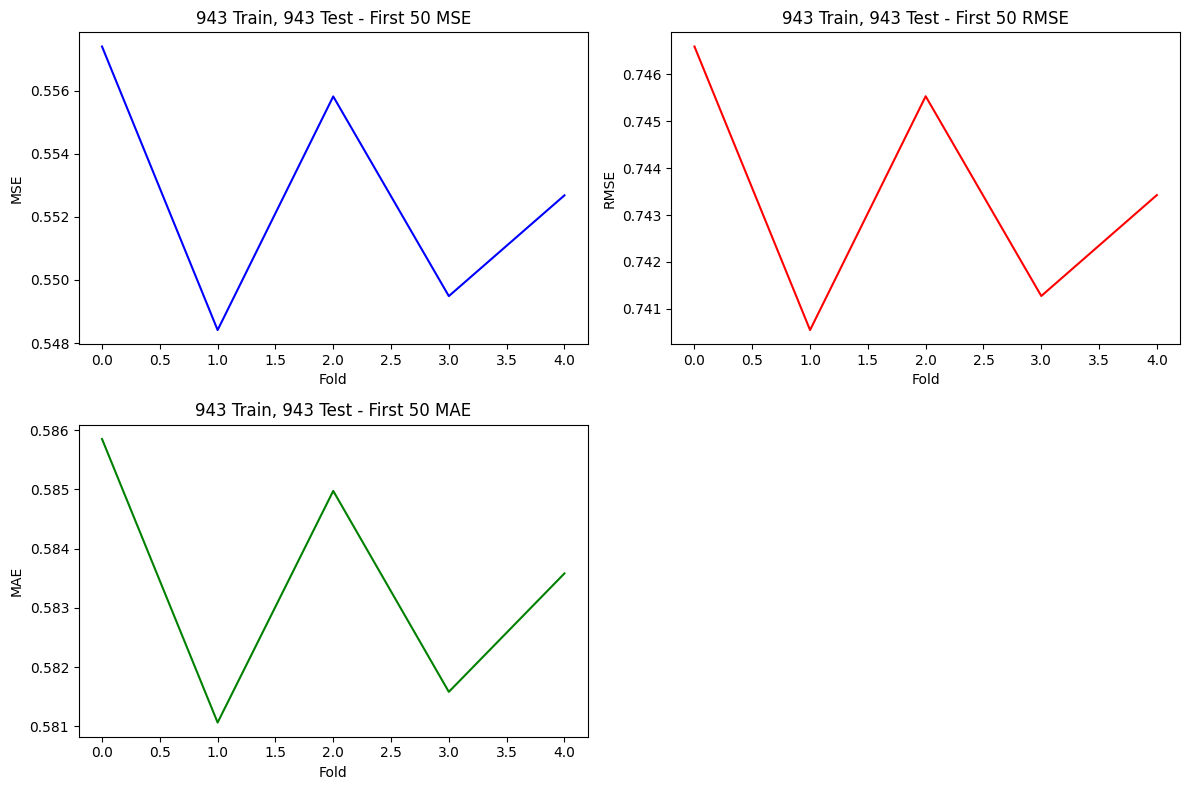

MSE: 0.5517
RMSE: 0.7427
MAE:  0.5829
MSE: 0.5513
RMSE: 0.7425
MAE:  0.5828
MSE: 0.5561
RMSE: 0.7457
MAE:  0.5847
MSE: 0.5533
RMSE: 0.7439
MAE:  0.5839
MSE: 0.5527
RMSE: 0.7435
MAE:  0.5833
983 Train, 943 Test -> MSE: 0.5530327077807315, RMSE: 0.7436608167741925, MAE: 0.5835178568095578


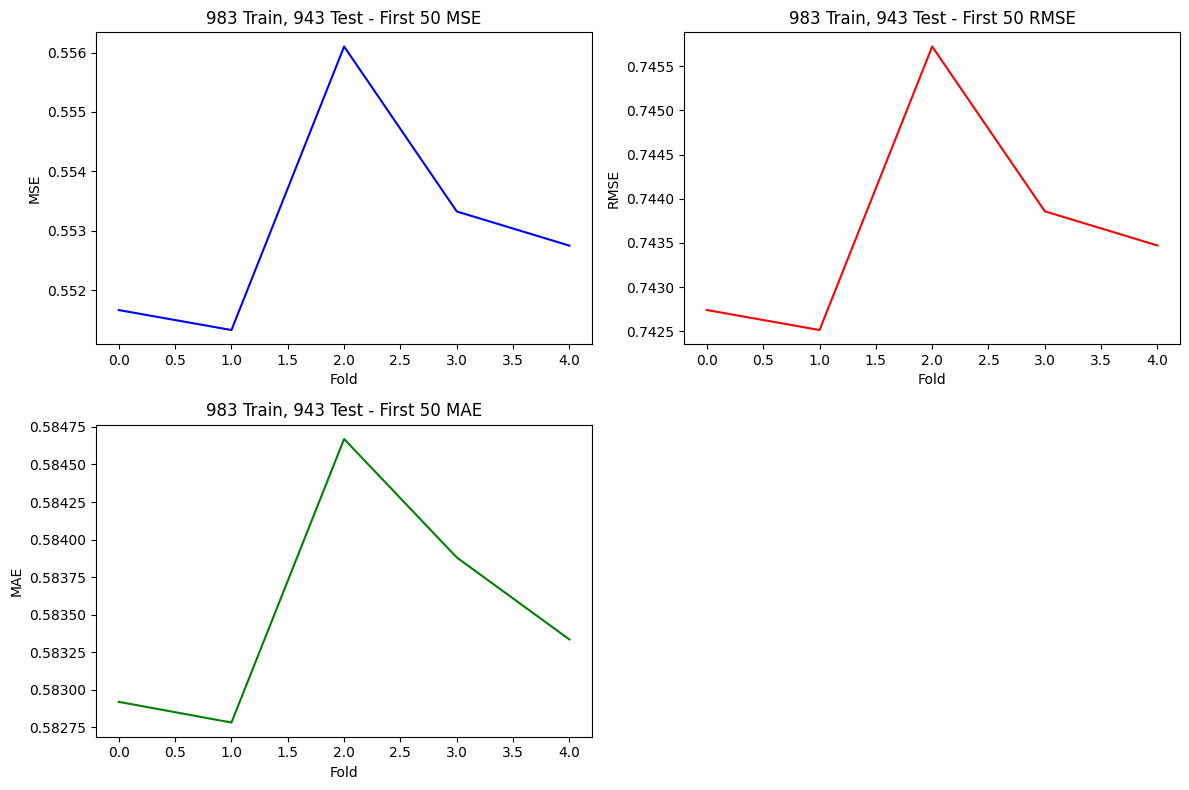

MSE: 0.5524
RMSE: 0.7433
MAE:  0.5830
MSE: 0.5547
RMSE: 0.7448
MAE:  0.5847
MSE: 0.5528
RMSE: 0.7435
MAE:  0.5828
MSE: 0.5497
RMSE: 0.7414
MAE:  0.5816
MSE: 0.5558
RMSE: 0.7455
MAE:  0.5853
1023 Train, 943 Test -> MSE: 0.5530805308276293, RMSE: 0.7436925007132493, MAE: 0.583476298876864


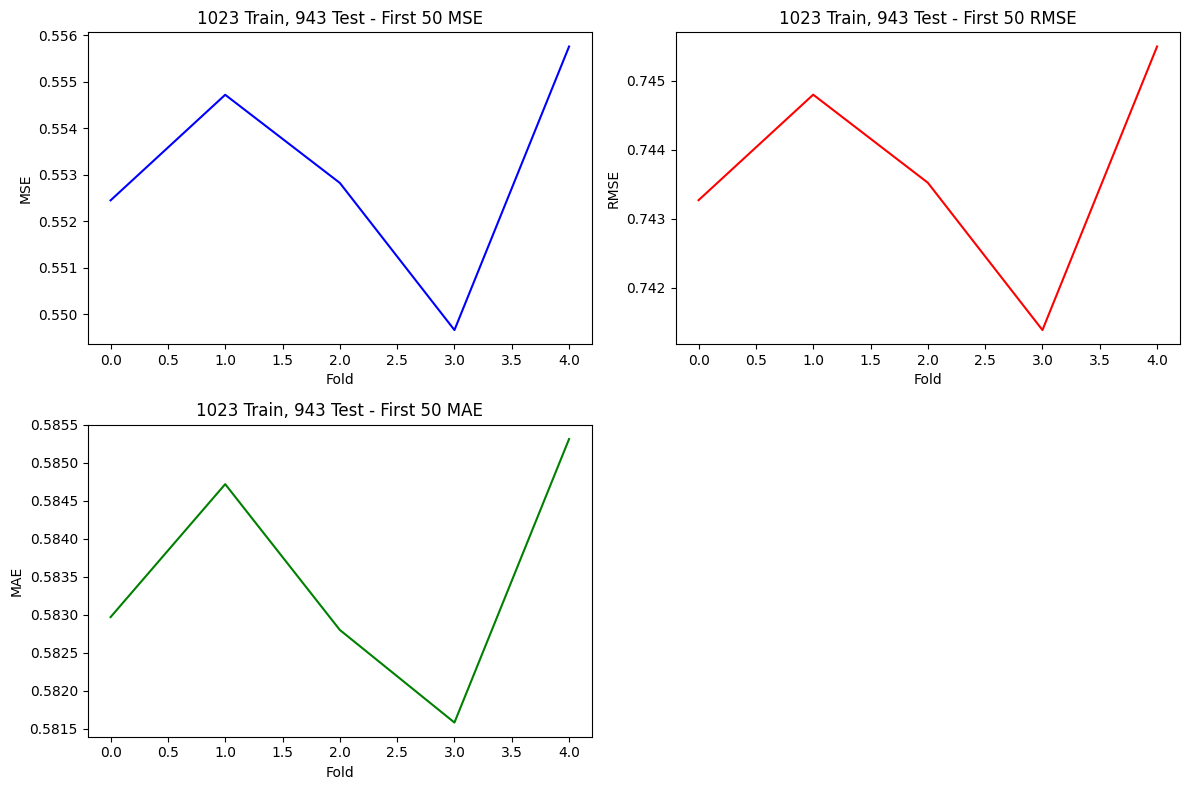

MSE: 0.5586
RMSE: 0.7474
MAE:  0.5865
MSE: 0.5568
RMSE: 0.7462
MAE:  0.5857
MSE: 0.5540
RMSE: 0.7443
MAE:  0.5834
MSE: 0.5540
RMSE: 0.7443
MAE:  0.5845
MSE: 0.5537
RMSE: 0.7441
MAE:  0.5835
1063 Train, 943 Test -> MSE: 0.5554173065271343, RMSE: 0.7452621081528149, MAE: 0.5847138167649606


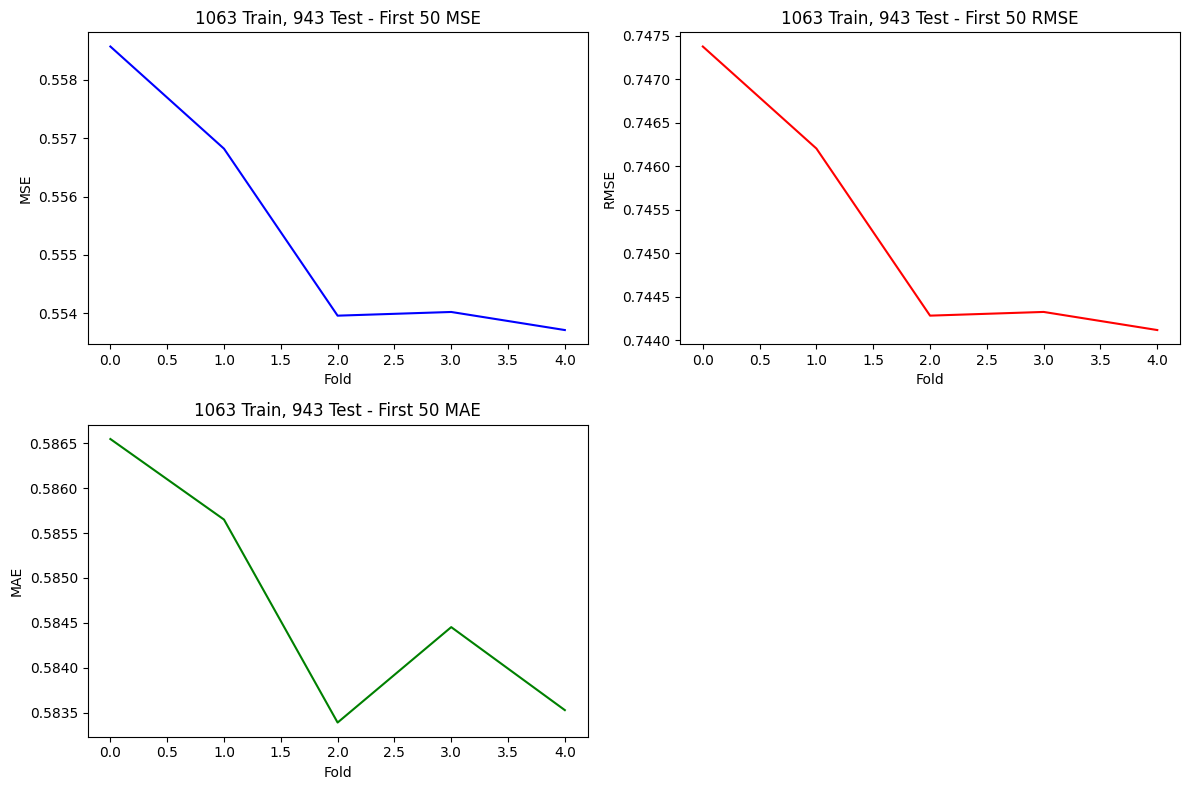

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import KFold
import time

# Function to load the dataset and perform SVD
def load_and_run_svd(train_df, test_df, dataset_name):
    reader = Reader(rating_scale=(0, 5))
    train_data = Dataset.load_from_df(train_df[['user_id', 'item_id', 'rating']], reader)
    test_data = Dataset.load_from_df(test_df[['user_id', 'item_id', 'rating']], reader)

    kf = KFold(n_splits=5, random_state=42, shuffle=True)

    mse_values = []
    rmse_values = []
    mae_values = []

    for fold, (trainset, _) in enumerate(kf.split(train_data), 1):
        model = SVD()
        model.fit(trainset)
        testset = test_data.build_full_trainset().build_testset()
        predictions = model.test(testset)

        mse = accuracy.mse(predictions)
        rmse = accuracy.rmse(predictions)
        mae = accuracy.mae(predictions)

        mse_values.append(mse)
        rmse_values.append(rmse)
        mae_values.append(mae)

    avg_mse = sum(mse_values) / len(mse_values)
    avg_rmse = sum(rmse_values) / len(rmse_values)
    avg_mae = sum(mae_values) / len(mae_values)

    print(f"{dataset_name} -> MSE: {avg_mse}, RMSE: {avg_rmse}, MAE: {avg_mae}")

    # Visualization of the first 50 datapoints
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(mse_values[:50], label='MSE', color='blue')
    plt.title(f'{dataset_name} - First 50 MSE')
    plt.xlabel('Fold')
    plt.ylabel('MSE')

    plt.subplot(2, 2, 2)
    plt.plot(rmse_values[:50], label='RMSE', color='red')
    plt.title(f'{dataset_name} - First 50 RMSE')
    plt.xlabel('Fold')
    plt.ylabel('RMSE')

    plt.subplot(2, 2, 3)
    plt.plot(mae_values[:50], label='MAE', color='green')
    plt.title(f'{dataset_name} - First 50 MAE')
    plt.xlabel('Fold')
    plt.ylabel('MAE')

    plt.tight_layout()
    plt.show()

# Load the datasets
df_943 = df_final
df_983 = df_40
df_1023 = df_80
df_1063 = df_120

# Train on 943, test on 943
load_and_run_svd(df_943, df_943, '943 Train, 943 Test')

# Train on 983, test on 943
load_and_run_svd(df_983, df_943, '983 Train, 943 Test')

# Train on 1023, test on 943
load_and_run_svd(df_1023, df_943, '1023 Train, 943 Test')

# Train on 1063, test on 943
load_and_run_svd(df_1063, df_943, '1063 Train, 943 Test')


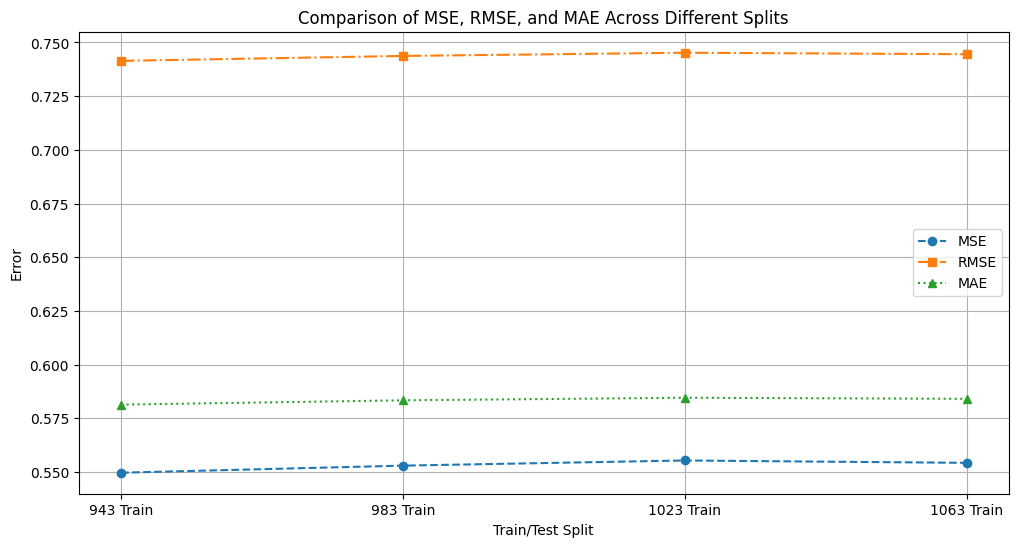

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Data for train/test splits
splits = ['943 Train', '983 Train', '1023 Train', '1063 Train']

# MSE, RMSE, and MAE values
mse_values = [0.5497, 0.5530, 0.5554, 0.5543]
rmse_values = [0.7414, 0.7437, 0.7452, 0.7445]
mae_values = [0.5814, 0.5834, 0.5846, 0.5841]

x = np.arange(len(splits))  # X-axis positions

# Plot MSE
plt.figure(figsize=(12, 6))
plt.plot(x, mse_values, marker='o', label='MSE', linestyle='--')
plt.plot(x, rmse_values, marker='s', label='RMSE', linestyle='-.')
plt.plot(x, mae_values, marker='^', label='MAE', linestyle=':')

# Add labels and title
plt.xticks(x, splits)
plt.xlabel('Train/Test Split')
plt.ylabel('Error')
plt.title('Comparison of MSE, RMSE, and MAE Across Different Splits')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



top-10

In [96]:
# Import the required libraries
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

# Define a function to apply SVD and generate top 10 recommendations for all users
def generate_top10_recommendations(df):
    # Create the user-item matrix
    user_item_matrix = df.pivot(index='user_id', columns='item_id', values='rating').fillna(0)

    # Convert user-item matrix to a sparse matrix
    user_item_matrix_sparse = csr_matrix(user_item_matrix.values)

    # Apply SVD on the sparse matrix
    U, sigma, Vt = svds(user_item_matrix_sparse, k=50)  # k is the number of latent factors
    sigma = np.diag(sigma)

    # Reconstruct predicted ratings matrix
    predicted_ratings = np.dot(np.dot(U, sigma), Vt)

    # Convert predicted ratings back to a DataFrame
    predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_item_matrix.index, columns=user_item_matrix.columns)

    # Generate top 10 recommendations for all users
    top_recommendations = []

    for user_id in user_item_matrix.index:
        # Get predictions for the user
        user_predictions = predicted_ratings_df.loc[user_id]
        
        # Get items the user has not rated yet
        already_rated = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index.tolist()
        unrated_items = user_predictions.drop(index=already_rated)
        
        # Get top 10 recommendations
        top_10_items = unrated_items.sort_values(ascending=False).head(10)
        
        # Store recommendations in descending order
        for item_id, score in top_10_items.items():
            top_recommendations.append({'user_id': user_id, 'item_id': item_id, 'predicted_rating': score})

    # Create a DataFrame with all top 10 recommendations
    recommendations_df = pd.DataFrame(top_recommendations).sort_values(by=['user_id', 'predicted_rating'], ascending=[True, False])
    
    return recommendations_df

# Generate recommendations for each dataset
top10_df_final = generate_top10_recommendations(df_final)
top10_df_40 = generate_top10_recommendations(df_40)
top10_df_80 = generate_top10_recommendations(df_80)
top10_df_120 = generate_top10_recommendations(df_120)

# Merge function to join recommendations with df_final on item_id to include the decade
def merge_with_decade_on_item_id(recommendations_df, df_final):
    # Select only necessary columns from df_final and drop duplicates
    df_final_subset = df_final[['item_id', 'decade']].drop_duplicates()

    # Merge on item_id to add decade
    merged_df = pd.merge(recommendations_df, df_final_subset, on='item_id', how='left')
    
    return merged_df

# Merge each recommendation DataFrame with df_final to add the decade
top10_df_final_with_decade = merge_with_decade_on_item_id(top10_df_final, df_final)
top10_df_40_with_decade = merge_with_decade_on_item_id(top10_df_40, df_final)
top10_df_80_with_decade = merge_with_decade_on_item_id(top10_df_80, df_final)
top10_df_120_with_decade = merge_with_decade_on_item_id(top10_df_120, df_final)

# Save the DataFrames as CSV files in the result directory
top10_df_final_with_decade.to_csv('../result/top10_df_final_with_decade.csv', index=False)
top10_df_40_with_decade.to_csv('../result/top10_df_40_with_decade.csv', index=False)
top10_df_80_with_decade.to_csv('../result/top10_df_80_with_decade.csv', index=False)
top10_df_120_with_decade.to_csv('../result/top10_df_120_with_decade.csv', index=False)

# print("All recommendation files have been successfully saved in the 'result' directory.")

# Display the first few rows to verify the results
top10_df_final_with_decade.head(), top10_df_40_with_decade.head(), top10_df_80_with_decade.head(), top10_df_120_with_decade.head()


(   user_id  item_id  predicted_rating  decade
 0        1      423          3.480956  1980.0
 1        1      403          3.107652  1980.0
 2        1      732          2.901051  1990.0
 3        1      357          2.767992  1970.0
 4        1      385          2.608116  1990.0,
    user_id  item_id  predicted_rating  decade
 0        1      732          3.868873  1990.0
 1        1      474          3.645656  1960.0
 2        1      582          3.269205  1990.0
 3        1      276          3.223599  1990.0
 4        1      515          2.798257  1990.0,
    user_id  item_id  predicted_rating  decade
 0        1      276          3.861032  1990.0
 1        1      732          3.777222  1990.0
 2        1      692          3.202927  1990.0
 3        1      474          2.964661  1960.0
 4        1      273          2.943158  1990.0,
    user_id  item_id  predicted_rating  decade
 0        1      276          3.890495  1990.0
 1        1      732          3.739732  1990.0
 2        

In [97]:
# Find the cluster for user_id == 1
user_cluster_1 = user_entropy[user_entropy['user_id'] == 510]['cluster'].values[0]

# Print the result
print(f"User_id 1 belongs to cluster: {user_cluster_1}")


User_id 1 belongs to cluster: 0


In [98]:
#cluster 0
top10_df_120_with_decade[top10_df_120_with_decade['user_id'] == 941]


,user_id,item_id,predicted_rating,decade
9400,941,50,2.658742,1970.0
9401,941,151,1.753597,1970.0
9402,941,237,1.597714,1990.0
9403,941,100,1.548720,1990.0
9404,941,169,1.503222,1990.0
9405,941,121,1.501438,1990.0
9406,941,250,1.432695,1990.0
9407,941,748,1.377717,1990.0
9408,941,471,1.261646,1990.0
9409,941,328,1.175589,1990.0


In [99]:
#cluster 0
top10_df_120_with_decade[top10_df_120_with_decade['user_id'] == 2]

,user_id,item_id,predicted_rating,decade
10,2,181,2.254949,1990.0
11,2,15,2.077939,1990.0
12,2,515,2.052041,1990.0
13,2,750,2.043380,1990.0
14,2,9,1.993016,1990.0
15,2,124,1.990298,1990.0
16,2,248,1.912729,1990.0
17,2,137,1.886590,1990.0
18,2,690,1.848318,1990.0
19,2,347,1.770207,1990.0


In [100]:
#cluster 1
top10_df_120_with_decade[top10_df_120_with_decade['user_id'] == 943]

,user_id,item_id,predicted_rating,decade
9420,943,651,3.551824,1980.0
9421,943,550,3.405944,1990.0
9422,943,265,3.361166,1990.0
9423,943,684,2.713201,1990.0
9424,943,742,2.551211,1990.0
9425,943,746,2.386094,1980.0
9426,943,288,2.283739,1990.0
9427,943,578,2.281309,1990.0
9428,943,735,2.245442,1990.0
9429,943,33,2.216918,1990.0


In [101]:
# Extract item_id sets for user_id = 1 from each dataset
items_final = set(top10_df_final_with_decade[top10_df_final_with_decade['user_id'] == 943]['item_id'])
items_40 = set(top10_df_40_with_decade[top10_df_40_with_decade['user_id'] == 943]['item_id'])
items_80 = set(top10_df_80_with_decade[top10_df_80_with_decade['user_id'] ==943]['item_id'])
items_120 = set(top10_df_120_with_decade[top10_df_120_with_decade['user_id'] == 943]['item_id'])

# Find common item_ids across all datasets
common_items = items_final & items_40 & items_80 & items_120

print(f"Common item_ids for user 943 across all datasets: {common_items}")


Common item_ids for user 943 across all datasets: {33, 578, 550, 742, 265, 651, 684, 735}


In [102]:
#cluster 2
top10_df_120_with_decade[top10_df_120_with_decade['user_id'] == 942]

,user_id,item_id,predicted_rating,decade
9410,942,181,3.616307,1990.0
9411,942,751,2.850045,1990.0
9412,942,204,2.570210,1980.0
9413,942,69,2.370472,1990.0
9414,942,483,2.359547,1940.0
9415,942,196,2.329861,1980.0
9416,942,515,2.328002,1990.0
9417,942,485,2.255052,1960.0
9418,942,98,2.219330,1990.0
9419,942,28,2.219039,1990.0


In [103]:
#cluster 2
top10_df_120_with_decade[top10_df_120_with_decade['user_id'] == 5]

,user_id,item_id,predicted_rating,decade
40,5,175,2.230820,1980.0
41,5,265,2.187098,1990.0
42,5,746,2.170576,1980.0
43,5,195,2.143417,1980.0
44,5,238,2.139855,1980.0
45,5,82,2.082318,1990.0
46,5,474,2.080929,1960.0
47,5,202,2.075889,1990.0
48,5,114,2.065035,1990.0
49,5,7,2.044367,1990.0


In [104]:
# Helper function to print cluster results for a user/item
def print_cluster_info(user_id, item_id, cluster_label):
    cluster = user_entropy[user_entropy['user_id'] == user_id]['cluster'].values[0]
    print(f"---- Cluster {cluster_label} ----")
    print(f"User_id {user_id} belongs to cluster: {cluster}\n")
    
    datasets = {
        "0": top10_df_final_with_decade,
        "40": top10_df_40_with_decade,
        "80": top10_df_80_with_decade,
        "120": top10_df_120_with_decade
    }
    
    for label, df in datasets.items():
        result = df[(df['user_id'] == user_id) & (df['item_id'] == item_id)]
        print(f"-------{label}:--------")
        if not result.empty:
            print(result.to_string(index=False))
        else:
            print(f"(user {user_id}, item {item_id}) not found in top10 for dataset {label}")
    print("\n")


# Call the function for each cluster
print_cluster_info(user_id=941, item_id=50, cluster_label=0)
print_cluster_info(user_id=943, item_id=651, cluster_label=1)
print_cluster_info(user_id=942, item_id=181, cluster_label=2)


---- Cluster 0 ----
User_id 941 belongs to cluster: 0

-------0:--------
 user_id  item_id  predicted_rating  decade
     941       50          2.574535  1970.0
-------40:--------
 user_id  item_id  predicted_rating  decade
     941       50          2.662865  1970.0
-------80:--------
 user_id  item_id  predicted_rating  decade
     941       50          2.649225  1970.0
-------120:--------
 user_id  item_id  predicted_rating  decade
     941       50          2.658742  1970.0


---- Cluster 1 ----
User_id 943 belongs to cluster: 1

-------0:--------
 user_id  item_id  predicted_rating  decade
     943      651          2.732116  1980.0
-------40:--------
 user_id  item_id  predicted_rating  decade
     943      651          3.667518  1980.0
-------80:--------
 user_id  item_id  predicted_rating  decade
     943      651          3.600629  1980.0
-------120:--------
 user_id  item_id  predicted_rating  decade
     943      651          3.551824  1980.0


---- Cluster 2 ----
User_id 94

In [105]:
print_cluster_info(user_id=1, item_id=423, cluster_label=1)

---- Cluster 1 ----
User_id 1 belongs to cluster: 1

-------0:--------
 user_id  item_id  predicted_rating  decade
       1      423          3.480956  1980.0
-------40:--------
 user_id  item_id  predicted_rating  decade
       1      423          2.751479  1980.0
-------80:--------
(user 1, item 423) not found in top10 for dataset 80
-------120:--------
(user 1, item 423) not found in top10 for dataset 120




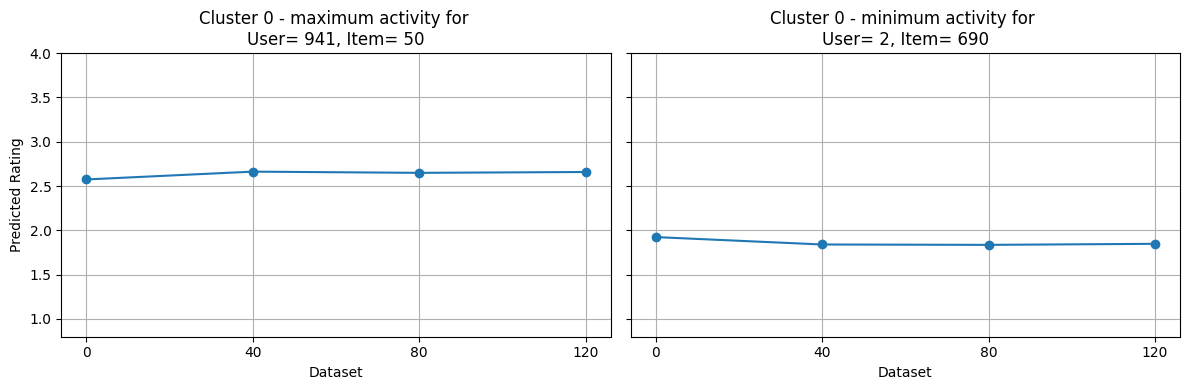

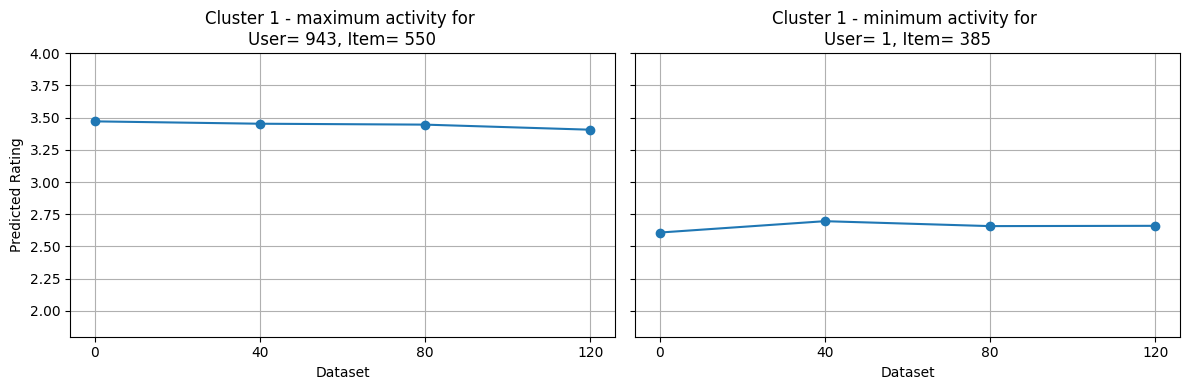

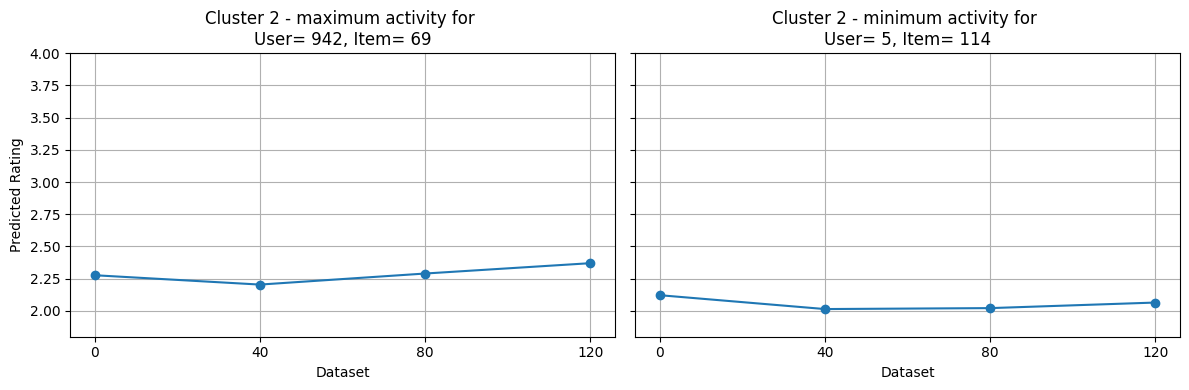

In [106]:
import matplotlib.pyplot as plt

# Define dataset labels
x_labels = ["0", "40", "80", "120"]

# Helper function to extract predicted rating or return NaN
def get_rating(df, user_id, item_id):
    result = df[(df['user_id'] == user_id) & (df['item_id'] == item_id)]
    return result['predicted_rating'].values[0] if not result.empty else float('nan')

# Extended plotting function to draw side-by-side plots
def plot_dual_cluster_ratings(cluster_label, max_pair, min_pair, y_range):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

    # Max plot
    max_ratings = [
        get_rating(top10_df_final_with_decade, *max_pair),
        get_rating(top10_df_40_with_decade, *max_pair),
        get_rating(top10_df_80_with_decade, *max_pair),
        get_rating(top10_df_120_with_decade, *max_pair)
    ]
    axs[0].plot(x_labels, max_ratings, marker='o', linestyle='-')
    axs[0].set_title(f"Cluster {cluster_label} - maximum activity for \nUser= {max_pair[0]}, Item= {max_pair[1]}")
    axs[0].set_xlabel("Dataset")
    axs[0].set_ylabel("Predicted Rating")
    axs[0].set_ylim(*y_range)
    axs[0].grid(True)

    # Min plot
    min_ratings = [
        get_rating(top10_df_final_with_decade, *min_pair),
        get_rating(top10_df_40_with_decade, *min_pair),
        get_rating(top10_df_80_with_decade, *min_pair),
        get_rating(top10_df_120_with_decade, *min_pair)
    ]
    axs[1].plot(x_labels, min_ratings, marker='o', linestyle='-')
    axs[1].set_title(f"Cluster {cluster_label} - minimum activity for \nUser= {min_pair[0]}, Item= {min_pair[1]}")
    axs[1].set_xlabel("Dataset")
    axs[1].set_ylim(*y_range)
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Cluster 0
plot_dual_cluster_ratings(cluster_label=0, max_pair=(941, 50), min_pair=(2, 690), y_range=(.8, 4))

# Cluster 1
plot_dual_cluster_ratings(cluster_label=1, max_pair=(943, 550), min_pair=(1, 385), y_range=(1.8, 4.0))

# Cluster 2
plot_dual_cluster_ratings(cluster_label=2, max_pair=(942, 69), min_pair=(5, 114), y_range=(1.8, 4))


In [ ]:
df_final[(df_final['user_id'] == 123) & (df_final['item_id'] == 474)]

In [108]:
df_cluster_2_top[(df_cluster_2_top['user_id'] == 123)]

,user_id,num_ratings
39,123,54


In [109]:
# Check if user_id 1 has rated item_id 276
rating_check = df_final[(df_final['user_id'] == 1) & (df_final['item_id'] == 515)]

# Check if the DataFrame is not empty
if not rating_check.empty:
    print(f"User 1 has rated item 515. Rating: {rating_check['rating'].values[0]}")
else:
    print("User 1 has not rated item 515.")

User 1 has not rated item 515.


measure/eval

In [123]:
import pandas as pd

# Define destination folder
save_path = "/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/result"

# Dictionary of in-memory DataFrames
files = {
    "0": top10_df_final_with_decade,
    "40": top10_df_40_with_decade,
    "80": top10_df_80_with_decade,
    "120": top10_df_120_with_decade
}

# Process and save
decade_counts = {}
for key, df in files.items():
    decade_count = df.groupby(['user_id', 'decade']).size().unstack(fill_value=0)
    decade_counts[key] = decade_count
    decade_count.to_csv(f"{save_path}/decade_counts_{key}.csv")

print("✅ Decade counts saved to /result directory.")


✅ Decade counts saved to /result directory.


In [124]:
# Define path to saved decade count files
base_path = "/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/result"

# Load decade counts
decade_counts = {
    "0": pd.read_csv(f"{base_path}/decade_counts_0.csv", index_col='user_id'),
    "40": pd.read_csv(f"{base_path}/decade_counts_40.csv", index_col='user_id'),
    "80": pd.read_csv(f"{base_path}/decade_counts_80.csv", index_col='user_id'),
    "120": pd.read_csv(f"{base_path}/decade_counts_120.csv", index_col='user_id'),
}

# Dictionary to store percent change DataFrames
percent_changes = {}

# Small epsilon to avoid division by zero
epsilon = 1e-6

# Compute percent change: (biased - unbiased) / (unbiased + epsilon) * 100
for bias in ['40', '80', '120']:
    unbiased = decade_counts['0']
    biased = decade_counts[bias]
    
    # Align rows and columns
    unbiased, biased = unbiased.align(biased, fill_value=0)
    
    # Percent change formula
    percent_change = ((biased - unbiased) / (unbiased + epsilon)) * 100
    percent_changes[bias] = percent_change
    
    # Save to CSV
    percent_change.to_csv(f"{base_path}/percent_change_{bias}.csv")

print("✅ Percent change per decade per user saved.")

✅ Percent change per decade per user saved.


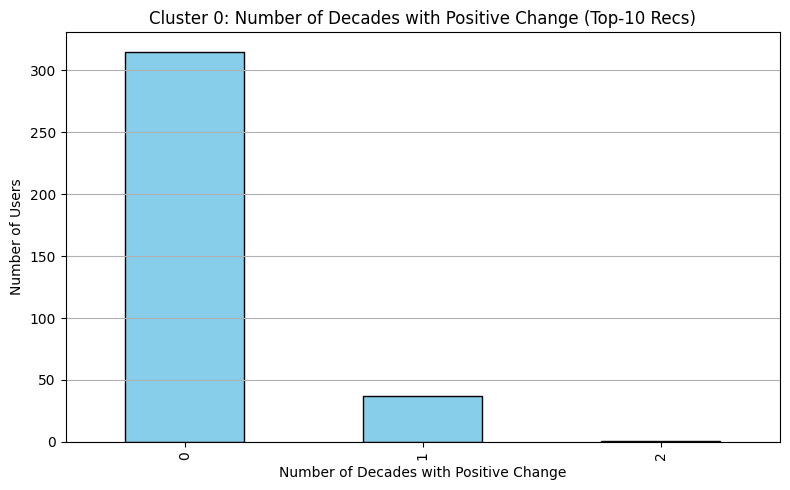

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Load user clusters
user_entropy = pd.read_csv("/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/preprocessing/user_entropy.csv")  # update with your actual path

# Load percent change (choose one: '40', '80', or '120')
percent_change_40 = pd.read_csv("/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/result/percent_change_40.csv", index_col='user_id')

# Filter to only users in Cluster 0
cluster_0_users = user_entropy[user_entropy['cluster'] == 0]['user_id']
percent_change_cluster_0 = percent_change_40.loc[percent_change_40.index.intersection(cluster_0_users)]

# Count how many decades had a positive change per user
positive_decade_counts = (percent_change_cluster_0 > 0).sum(axis=1)

# Plot the histogram
plt.figure(figsize=(8, 5))
positive_decade_counts.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster 0: Number of Decades with Positive Change (Top-10 Recs)')
plt.xlabel('Number of Decades with Positive Change')
plt.ylabel('Number of Users')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [110]:
from sklearn.metrics import ndcg_score
import numpy as np

# Function to calculate Precision@k
def precision_at_k(actual, predicted, k=10):
    relevant_items = set(actual)
    recommended_items = set(predicted[:k])
    return len(relevant_items & recommended_items) / k

# Function to calculate Recall@k
def recall_at_k(actual, predicted, k=10):
    relevant_items = set(actual)
    recommended_items = set(predicted[:k])
    return len(relevant_items & recommended_items) / len(relevant_items)

# Function to calculate Hit Rate@k
def hit_rate_at_k(actual, predicted, k=10):
    relevant_items = set(actual)
    recommended_items = set(predicted[:k])
    return 1 if len(relevant_items & recommended_items) > 0 else 0

# Function to calculate Jaccard Similarity between two sets
def jaccard_similarity(set1, set2):
    return len(set1 & set2) / len(set1 | set2)

# Example: Compare recommendations for a sample user
actual_items = [276, 474, 732, 423, 403]  # Example: Actual items the user rated
predicted_items_df_final = [423, 403, 732, 276, 357]  # Predicted by df_final
predicted_items_df_40 = [732, 474, 582, 276, 515]  # Predicted by df_40

# Calculate Precision@10 and Recall@10 for df_final and df_40
precision_df_final = precision_at_k(actual_items, predicted_items_df_final, k=5)
recall_df_final = recall_at_k(actual_items, predicted_items_df_final, k=5)

precision_df_40 = precision_at_k(actual_items, predicted_items_df_40, k=5)
recall_df_40 = recall_at_k(actual_items, predicted_items_df_40, k=5)

# Jaccard Similarity between predictions of df_final and df_40
jaccard_score = jaccard_similarity(set(predicted_items_df_final), set(predicted_items_df_40))

print(f"Precision@5 for df_final: {precision_df_final:.4f}")
print(f"Recall@5 for df_final: {recall_df_final:.4f}")
print(f"Precision@5 for df_40: {precision_df_40:.4f}")
print(f"Recall@5 for df_40: {recall_df_40:.4f}")
print(f"Jaccard Similarity between df_final and df_40: {jaccard_score:.4f}")


Precision@5 for df_final: 0.8000
Recall@5 for df_final: 0.8000
Precision@5 for df_40: 0.6000
Recall@5 for df_40: 0.6000
Jaccard Similarity between df_final and df_40: 0.2500


Cross-Validation vs Train-Test Split
The first code uses cross-validation (cross_validate function from Surprise library), which splits the data into training and testing sets multiple times (in this case, 5 times). The model is trained and evaluated on each split, and the average performance metrics (RMSE, MAE) are calculated.
The second code uses a single train-test split (train_test_split function from Surprise library), where the data is split into training and testing sets only once. The model is trained on the training set and evaluated on the testing set.

In [111]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
import pandas as pd

# Step 1: Load datasets

reader = Reader(rating_scale=(0, 5))
data_943k = Dataset.load_from_df(df_final[['user_id', 'item_id', 'rating']], reader)
data_983k = Dataset.load_from_df(df_40[['user_id', 'item_id', 'rating']], reader)

# Step 2: Define model (same for both)
model_943k = SVD()
model_983k = SVD()

# Step 3: Cross-validation
results_943k = cross_validate(model_943k, data_943k, measures=['RMSE', 'MAE'], cv=5, verbose=False)
results_983k = cross_validate(model_983k, data_983k, measures=['RMSE', 'MAE'], cv=5, verbose=False)

# Step 4: Compute average scores
avg_rmse_943k = sum(results_943k['test_rmse']) / len(results_943k['test_rmse'])
avg_mae_943k = sum(results_943k['test_mae']) / len(results_943k['test_mae'])

avg_rmse_983k = sum(results_983k['test_rmse']) / len(results_983k['test_rmse'])
avg_mae_983k = sum(results_983k['test_mae']) / len(results_983k['test_mae'])

# Step 5: Print comparison
print("📊 Cross-Validation Results (5-fold)")
print(f"Original 943k → RMSE: {avg_rmse_943k:.4f}, MAE: {avg_mae_943k:.4f}")
print(f"Biased 983k  → RMSE: {avg_rmse_983k:.4f}, MAE: {avg_mae_983k:.4f}")


📊 Cross-Validation Results (5-fold)
Original 943k → RMSE: 0.9354, MAE: 0.7372
Biased 983k  → RMSE: 0.9016, MAE: 0.6913


✅ Step 2: Train on All 100k Data & Recommend Top-10 Items per User

In [112]:
# Search for user_id 196
user_196_df = df_final[df_final['user_id'] == 196]

# Display the results
print(user_196_df)

       user_id  item_id  rating  decade
0          196      242       3  1990.0
940        196      393       4  1990.0
1133       196      381       4  1990.0
1812       196      251       3  1990.0
1896       196      655       5  1980.0
2374       196       67       5  1990.0
6910       196      306       4  1990.0
7517       196      238       4  1980.0
7842       196      663       5  1970.0
10017      196      111       4  1990.0
10254      196      580       2  1990.0
10981      196       25       4  1990.0
13733      196      286       5  1990.0
14606      196       94       3  1990.0
16834      196      692       5  1990.0
17102      196        8       5  1990.0
17830      196      428       4  1970.0
18853      196     1118       4  1970.0
21605      196       70       3  1990.0
22271      196       66       3  1990.0
22773      196      257       2  1990.0
23189      196      108       4  1990.0
24030      196      202       3  1990.0
25726      196      340       3  1990.0


In [115]:
# Step 1: Train Model B on full 101k dataset
trainset_101k = data_101k.build_full_trainset()
model_b = SVD()
model_b.fit(trainset_101k)

# Step 2: Use the same users from df_final (100k), and items from 101k
test_users = df_final['user_id'].unique()
all_items_101k = df_101_SVD['item_id'].unique()

# Step 3: Items already rated by test users (from df_final)
user_rated_items = df_final.groupby('user_id')['item_id'].apply(set).to_dict()

# Step 4: Predict on unseen items and get Top-10
top_10_recommendations_b = defaultdict(list)

for uid in test_users:
    seen = user_rated_items.get(uid, set())
    unseen = [iid for iid in all_items_101k if iid not in seen]

    ‍predictions = [(iid, model_b.predict(uid, iid).est) for iid in unseen]
    top_10 = sorted(predictions, key=lambda x: x[1], reverse=True)[:10]
    top_10_recommendations_b[uid] = top_10

# Step 5: Convert to DataFrame
top_10_b_df = pd.DataFrame([
    [uid, iid, pred] for uid, recs in top_10_recommendations_b.items() for iid, pred in recs
], columns=['User ID', 'Recommended Item', 'Predicted Rating'])

# Save the recommendations
top_10_b_df.to_csv("B-top10_recommendations_101k.csv", index=False)
print("✅ B - Top-10 recommendations from 101k saved.")

SyntaxError: invalid non-printable character U+200D (4225346966.py, line 20)

Evaluation

✅ 1. Hit Rate
Definition: Fraction of users for whom at least 1 of the Top-10 recommended items was actually rated.

In [116]:
# Load Top-10s if needed
top10_A_df = pd.read_csv("A-top10_recommendations_100k.csv")
top10_B_df = pd.read_csv("B-top10_recommendations_101k.csv")

# Ground truth (actual user ratings in 100k)
ground_truth = df_final.copy()

# Build lookup: items each user actually rated
user_actual_items = ground_truth.groupby('user_id')['item_id'].apply(set).to_dict()

FileNotFoundError: [Errno 2] No such file or directory: 'A-top10_recommendations_100k.csv'

✅ 2. Precision@10
Definition: For each user, how many of the Top-10 recommendations were actually rated?
Then average across users.

In [ ]:
def compute_precision_at_10(top_10_df, user_actual_items):
    precision_sum = 0
    total_users = top_10_df['User ID'].nunique()

    for user, group in top_10_df.groupby('User ID'):
        rec_items = set(group['Recommended Item'])
        actual_items = user_actual_items.get(user, set())
        true_positives = len(rec_items & actual_items)
        precision_sum += true_positives / 10  # Top-10 list
        
    return precision_sum / total_users

✅ 3. Recommendation Overlap
Definition: For each user, compute overlap between Top-10 items from Model A and B.

In [136]:
import pandas as pd
from datetime import datetime, timedelta

# Create a 30-day commitment challenge table starting from today
start_date = datetime.today()
days = [start_date + timedelta(days=i) for i in range(30)]

# Create DataFrame
df = pd.DataFrame({
    "روز": list(range(1, 31)),
    "تاریخ": [day.strftime("%Y-%m-%d") for day in days],
    "✔ انجام شد؟": [""] * 30,
    "حس امروز": [""] * 30,
    "یادداشت کوتاه": [""] * 30,
    "پیاده‌روی چی؟": [""] * 30
})
# Save the DataFrame to a CSV file
df.to_csv("30_day_commitment_challenge.csv", index=False, encoding='utf-8-sig')
# Display the DataFrame
print(df)


    روز       تاریخ ✔ انجام شد؟ حس امروز یادداشت کوتاه پیاده‌روی چی؟
0     1  2025-05-01                                                 
1     2  2025-05-02                                                 
2     3  2025-05-03                                                 
3     4  2025-05-04                                                 
4     5  2025-05-05                                                 
5     6  2025-05-06                                                 
6     7  2025-05-07                                                 
7     8  2025-05-08                                                 
8     9  2025-05-09                                                 
9    10  2025-05-10                                                 
10   11  2025-05-11                                                 
11   12  2025-05-12                                                 
12   13  2025-05-13                                                 
13   14  2025-05-14               